# Performing Exploratory Data Analysis to undestand the data


In [1]:
import numpy as np    #For working in arrays and matrices
import pandas as pd    # for Manipulation Dataframe /Reading datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading dataset
df = pd.read_csv('/home/brain/Desktop/netflix.csv')
# df.head(10)  #Bydefalut value is 5 for head
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape  # tells us the rows and column of dataset

(8807, 12)

In [4]:
print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [5]:
df.describe()  # tells us basic statistics about integer columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.info() # shows the count and datatypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [7]:
df.isna().sum() # Missing values 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [35]:
# df.isna()  # True values shows Null values

# Handling Missing Values

Description:- In Datasets Column name 'director','cast','country','date_added','rating','duration' having the null values.So i will change the Null values into 'Unavailable'.
And for the 

In [9]:
df.fillna({'duration':'Unavailable','cast':'Unavailable', 'country':'Unavailable', 'rating':'Unavailable'})

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unavailable,Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,Unavailable,Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [11]:
recent_date = df['date_added'].max()
df.fillna({'date_added':recent_date},inplace = True)

In [12]:
df[df.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


# Additional Data Cleansing 

In [13]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [14]:
df[df.director == 'Louis C.K.'].head() # Accessing Director name having "Louis C.K." 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
# Accessing Director name having 'Louis C.K.' and duration and replace value with the Rating values

In [16]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'
# After this we also have to change the value of rating columns having Director name : "Louis C.K." wiht the value of Unavailable

In [17]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


# Visualization

In [18]:
df.type.value_counts() # it shows different count of categories in column

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type of shows')

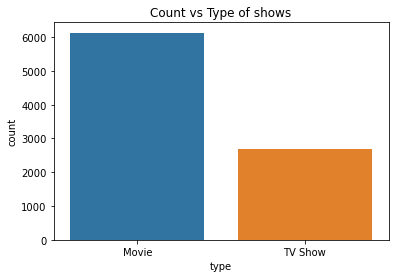

In [19]:
sns.countplot(x='type', data = df)
plt.title('Count vs Type of shows')

# Country Analysis

In [20]:
# Total count :- 8807
# 75% of data is 2019
# Total country  = 831

df_country = df['country'].value_counts().head(15)


United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise content on netflix')

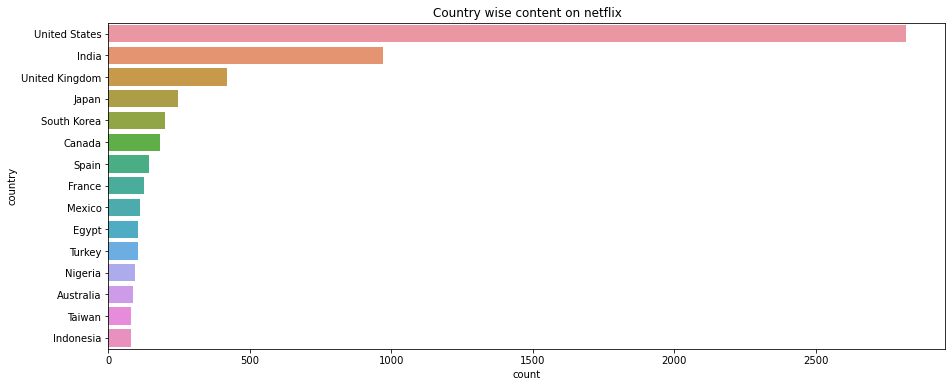

In [21]:
#combine Graph of shows and tv according to Country
plt.figure(figsize=(15,6))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:15],data=df)
plt.title('Country wise content on netflix')

In [22]:
#Now checking type of content based on contry
# Created two varialbles for Tv and Movies and store the data into these variables
movie_country = df[df['type'] == 'Movie']
tv_show_countries = df[df['type'] == 'TV Show']

Text(0.5, 1.0, 'Top 15 countries producing movies in nretflix')

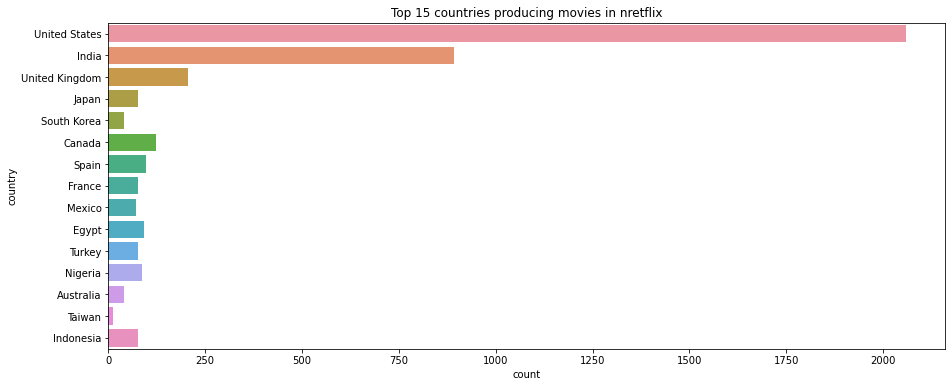

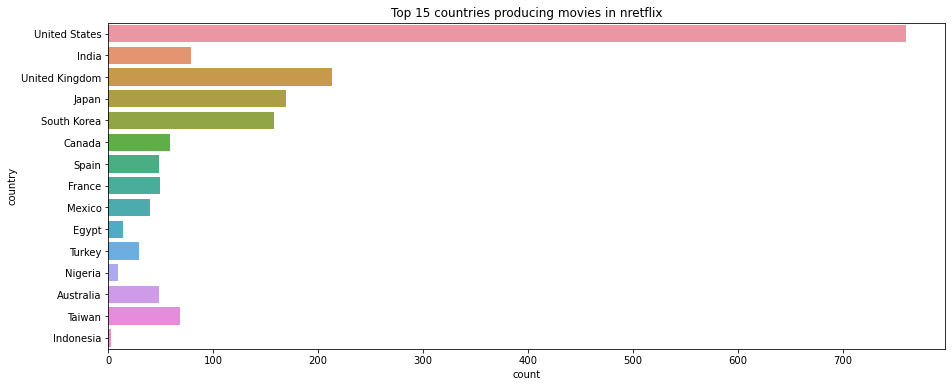

In [26]:
# Now we will plot the graph of both Movies and TV show
plt.figure(figsize=(15,6))
sns.countplot(y = 'country',order = df['country'].value_counts().index[0:15],data = movie_country)
plt.title('Top 15 countries producing movies in nretflix')


# Now we will plot the graph of both Movies and TV show
plt.figure(figsize=(15,6))
sns.countplot(y = 'country',order = df['country'].value_counts().index[0:15],data = tv_show_countries)
plt.title('Top 15 countries producing movies in nretflix')


# Major rating given to netflix

In [27]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
NC-17             3
Unavailable       3
UR                3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating of show on netflix vs count')

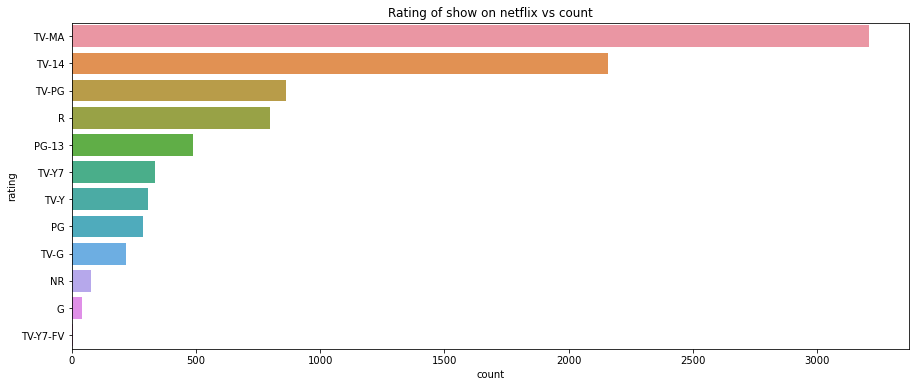

In [30]:
# Now we will plot the graph of both Movies and TV show
plt.figure(figsize=(15,6))
sns.countplot(y = 'rating',order = df['rating'].value_counts().index[0:12],data = df)
plt.title('Rating of show on netflix vs count')
#netflix has produced content maximum for adults public only

In [32]:
df.release_year.value_counts()[:25]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Rating of show on netflix vs count')

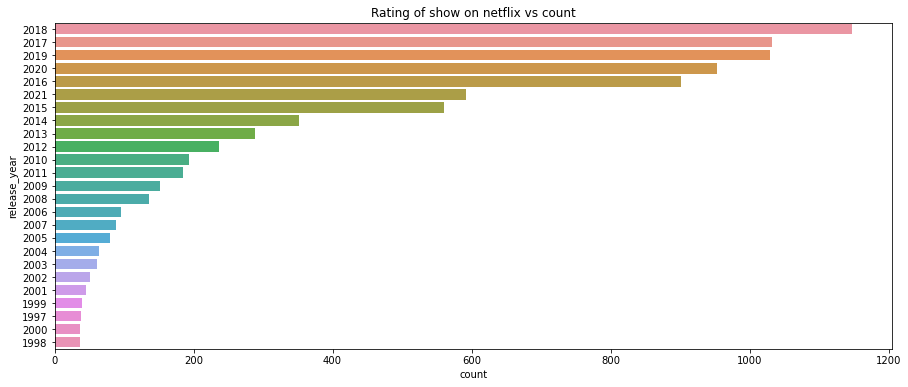

In [33]:
# Now we will plot the graph of both Movies and TV show
plt.figure(figsize=(15,6))
sns.countplot(y = 'release_year',order = df['release_year'].value_counts().index[0:25],data = df)
plt.title('Rating of show on netflix vs count')
#netflix has produced content maximum for adults public only
#2018 is the most relesed content year both movies and shows

# Popular genres analysis

Text(0.5, 1.0, 'Top 20 genres')

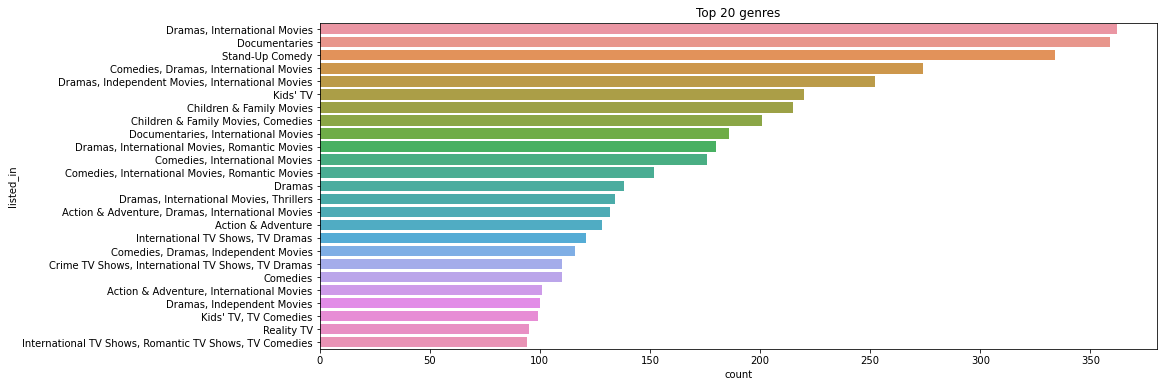

In [34]:
# Now we will plot the graph of both Movies and TV show
plt.figure(figsize=(15,6))
sns.countplot(y = 'listed_in',order = df['listed_in'].value_counts().index[0:25],data = df)
plt.title('Top 20 genres')


# Summary

In [ ]:
so far i had perform lots of operations over the datasets to find some useful information.
1. Netflix has more Movies than TV shows
2. Most movies and Tv shows are from United state and India is the second most content producer on netflix.
3. Most of the content on Netflix id for Matured Audience.
4. 2018 is the year in which netflix released most content as comparefd to other years.
5. International Movies and Dramas are the most popular genres on netflix.